#<h5 align="center"><i></i></h5>
<font color="orange" face="Comic Sans MS, Arial"><h1 align="center">
El Descenso del Gradiente Estocástico</h1></font>
<font color="black" face="Comic Sans MS, Arial">
 <h5 align="center"><font color = "black"><i></i></h5>
  <h5 align="center"><font color = ""><i>Stochastic Gradient Descent</i></h5>
</font>


###<font color="teal" face="Comic Sans MS, Arial">Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets
import time
import random as r

plt.rcParams.update({'text.usetex':True})
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

#<font color="orange" face="Comic Sans MS, Arial">Objetivo general

El Descenso de Gradiente Estocástico, no trabaja sobre una función cualquiera, sino que, dada una serie de datos, se considera una función de costo o pérdida $l$; y el objetivo principal del algoritmo es igual minimizar la pérdida para optimizar alguna operación o proceso.

La idea esencial para lograr esto es: en lugar de tomar todos los datos, sólo se toma un lote (batch) $B_n$ aleatorio de tamaño $n$, y se aplica el Descenso de Gradiente en la función de costo, pero considerando únicamente el subconjunto de puntos elegido. Esto simplifica la función a optimizar y reduce la complejidad del algoritmo. En resumen:

&nbsp;

---

<font face="Comic Sans MS, Arial"><font color="sky blue"> Descenso del Gradiente Estocástico </font>

---
Parámetros: punto inicial $\omega_0\in\mathbb{R}^{d}$; tamaño de paso $\eta>0$; número de iteraciones $T\in\mathbb{N}$.


1. Se define $B_n \subseteq \Omega$ un subconjunto aleatorio de tamaño $n$ de datos en mi muestra
2. Se le aplica la función de pérdida $l$ al subconjunto $B_n$
3. Usando la función $l(B_n)$, definida por el paso anterior, se le aplica el Descenso de Gradiente

Finalmente se escribe:
$$w_{t+1}=w_t-\eta\nabla l(B_n)$$


---



#<font color="orange" face="Comic Sans MS, Arial">Ejemplo ilustrativo

Sea $\Omega=\{(-50,50),(50,-50),(10,10),(-10,-10)\}$ nuestro conjunto de datos, donde cada par $\omega=(\omega_1,\omega_2)$ representa algun dato $\omega_1$ y algun otro dato $\omega_2$ de una persona, objeto o individuo diferente (la temperatura de un cuarto, el crecimiento porcentual de una divisa respecto a la moneda local, o algun balance de presupuesto). Dados estos datos, supóngase la siguiente función de pérdida:

$$l(x,y)=\sum_{\omega\in \Omega}{\left[\left((x-\omega_1)-(y-\omega_2)\right)^2 +x^2+y^2 \right]}$$

De manera explícita:
$$l(x,y)=\left[\left((x-(-50))-(y-50)\right)^2 +x^2+y^2 \right]+\left[\left((x-50)-(y-(-50))\right)^2 +x^2+y^2 \right]+\left[\left((x-10)-(y-10)\right)^2 +x^2+y^2 \right]+\left[\left((x-(-10))-(y-(-10))\right)^2 +x^2+y^2 \right]$$

Esta función se muestra a continuación:

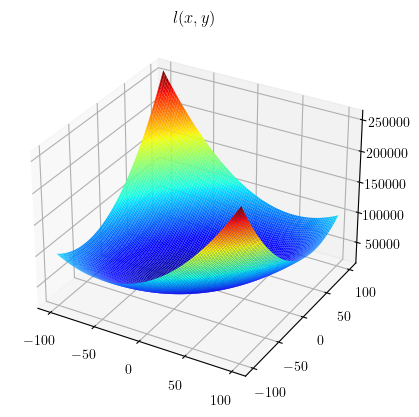

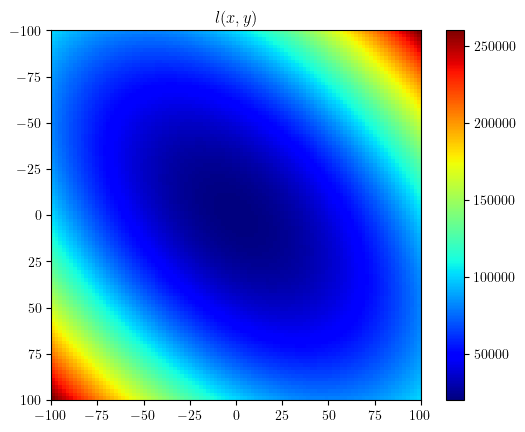

In [2]:
def l(x,y):
  p=[(-50,50),(50,-50),(10,10),(-10,-10)]
  return sum([((x-p[i][0]) - (y-p[i][1]))**2 + (x**2 + y**2) for i in range(len(p))])

# Generar valores de x e y para crear una malla de puntos
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)

# Crear una malla 2D de puntos X, Y
X, Y = np.meshgrid(x, y)

Z=l(X,Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
plt.title('$l(x,y)$')
plt.show()

plt.imshow(Z, cmap='jet', extent=[-100, 100, 100, -100])
plt.title('$l(x,y)$')
plt.colorbar()
plt.show()

De forma general, la función de costo asociada al lote $B_n$ se denota como $l(B_n)$

\begin{align*}
  l(B_n)&=\sum_{\omega\in B_n}{\left[((x-\omega_1)-(y-\omega_2))^2 +x^2+y^2 \right]}\\
  &= \sum_{\omega\in B_n}{\left[(x-\omega_1)^2-2(x-\omega_1)(y-\omega_2)+(y-\omega_2)^2 +x^2+y^2 \right]}
\end{align*}

<br>Siendo así las derivadas parciales para el gradiente:
\begin{align*}
  \frac{\partial}{\partial x}l &=\sum_{\omega\in B_n}{\left[2(x-\omega_1)-2(y-\omega_2) + 2x \right]}\\
\end{align*}

\begin{align*}
  \frac{\partial}{\partial y}l &=\sum_{\omega\in B_n}{\left[-2(x-\omega_1)+2(y-\omega_2) + 2y \right]}\\
\end{align*}

#<font color="orange" face="Comic Sans MS, Arial">Animación

A continuación se hará el Descenso de Gradiente Estocástico de $l$, con $T=25$ pasos, tamaño de lote $n=2$.

In [3]:
#función de costo dado un lote B_n
def l(x,y,lote):
  return sum([((x-w[0]) - (y-w[1]))**2 + (x**2 + y**2) for w in lote])

#gradiente de l dado un lote B_n
def grad_l(x,y,lote):
  return (sum([2*(x-w[0]) - 2*(y-w[1]) + 2*x for w in lote]), sum([- 2*(x-w[0]) + 2*(y-w[1]) + 2*y for w in lote]))

#descenso del gradiente estocástico de l
def descenso_gradiente_estocastico_l(w0, T, eta, n):
    wt = np.array(w0)
    w = []
    w.append(wt)

    # Graficar la función y el punto inicial
    plt.imshow(Z, cmap='jet', extent=[-100, 100, 100, -100])
    plt.colorbar()
    plt.scatter(w0[0], w0[1], c='orange')
    plt.annotate('$'+str(w0)+'$', w0)

    puntos=[(-50,50),(50,-50),(10,10),(-10,-10)]
    # Realizar el descenso de gradiente
    for t in range(T):
        lote=r.sample(puntos,n)
        grad_wt = np.array(grad_l(wt[0], wt[1], lote))
        wt = wt - eta * grad_wt
        #plt.scatter(wt[0], wt[1], c='orange')
        w.append(wt)

    # Graficar el descenso de gradiente
    wx=np.array([t[0] for t in w])
    wy=np.array([t[1] for t in w])
    plt.quiver(wx[:-1],wy[:-1],wx[1:]-wx[:-1],wy[1:]-wy[:-1], scale_units='xy', angles='xy', scale=1, color='white', width=0.005)

    # Configuración adicional del gráfico
    plt.title('Descenso de Gradiente Estocástico de $l$ \n $T='+str(T)+'$, $\eta='+str(eta)+'$, $n='+str(n)+'$ \n Punto final: $'+str(tuple(w[-1]))+'$')
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.scatter(0,0,color="red",marker='X')
    plt.scatter(w[-1][0],w[-1][1],color="black",marker="^")
    plt.legend(['Punto inicial','Descenso del Gradiente Estocástico','Punto minimo','Punto final'],loc='best', bbox_to_anchor=(0.4, -0.65, 0.5, 0.5),facecolor='gray')
    plt.show()

    return w


# Crear un control deslizante para ajustar el tamaño del paso (tasa de aprendizaje)
eta_slider = widgets.FloatSlider(value=.05, min=0.01, max=.1, step=0.005, description='η')

# Definir la función de visualización interactiva
@interact(eta=eta_slider)


def visualize_sgd(eta):
  #tomar el tiempo
  inicio = time.time()
  # Realizar el descenso de gradiente
  w = descenso_gradiente_estocastico_l((40, -10), 25, eta, 1)
  #fin de ejecución tiempo
  fin = time.time()
  tiempo = fin - inicio
  print("Tiempo de ejecución: ", tiempo)

interactive(children=(FloatSlider(value=0.05, description='η', max=0.1, min=0.01, step=0.005), Output()), _dom…

Como se podrá notar en la trayectoria del algoritmo, este método tiene más ruido, en el sentido de que los pasos no necesariamente van decreciendo ni siguiendo un camino *suave*. Incluso si está muy cerca del punto mínimo, queda oscilando alrededor de éste, donde el tamaño de la oscilación depende de $\eta$. Este comportamiento pasa porque en cada paso, la función de costo cambia, entonces tiene un mínimo diferente.

Sin embargo, a pesar de que oscila, si $\eta$ es suficientemente pequeño, la longitud de la oscilación (que es equivalente al rango de incertidumbre) también se mantiene pequeña. Es por ello que en la práctica real se busca que $\eta$ disminuya conforme se itera para irse aproximando más al punto mínimo. También se va bajando el tamaño $n$ de los lotes, pues una vez estando cerca del mínimo, se puede sacrificar precisión a cambio de costo computacional, acelerando así el proceso.

# Conclusiones

Por lo tanto, el Descenso del Gradiente Estocástico en general intercambia menor precisión por mayor rapidez en comparación del Descenso del Gradiente puro; lo cual es viable en la aplicación, ya que normalmente se procesan cantidades enormes de datos y considerarlos a todos es altamente costoso y lento, por lo que es preferible algo más rápido, que aunque menos preciso en principio, puede tener un margen de error tan pequeño como se quiera.